In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
### General imports ###
import os
from glob import glob
import pickle
import itertools
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

### Graph imports ###
import matplotlib.pyplot as plt
from PIL import Image

### Audio import ###
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import IPython.display as ipd 

In [ ]:
TESS = "/content/drive/My Drive/Emotion/toronto-emotional-speech-set-tess/"
RAV = "/content/drive/My Drive/Emotion/Audio_Speech_Actors_01-24/"
SAVEE = "/content/drive/My Drive/Emotion/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "/content/drive/My Drive/Emotion/cremad/AudioWAV/"

In [ ]:
def extract_mfcc(wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path_to_wav_file
    #Output: mfcc_features'''
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [ ]:
mfcc.shape

(13, 196)

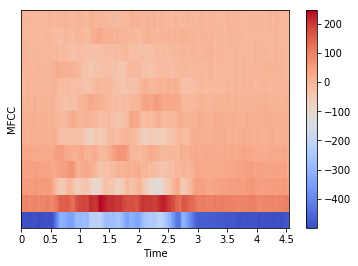

In [ ]:
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
# RAVDESS Database
label_dict_ravdess = {'02': 'NEU', '03':'HAP', '04':'SAD', '05':'ANG', '06':'FEA', '07':'DIS', '08':'SUR'}

# Set audio files labels
def set_label_ravdess(audio_file, gender_differentiation):
    label = label_dict_ravdess.get(audio_file[6:-16])
    if gender_differentiation == True:
        if int(audio_file[18:-4])%2 == 0: # Female
            label = 'f_' + label
        if int(audio_file[18:-4])%2 == 1: # Male
            label = 'm_' + label
    return label

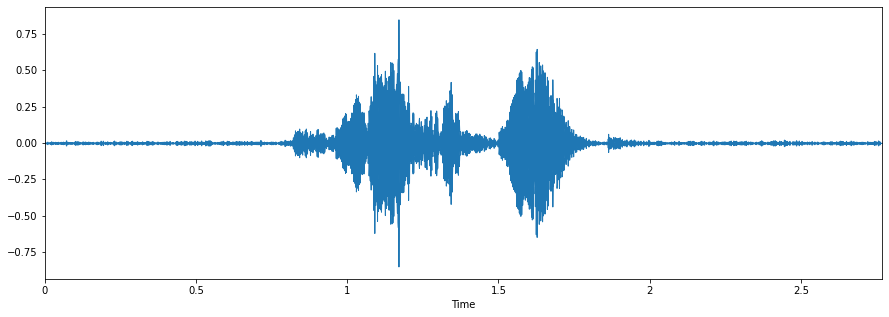

In [ ]:
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [ ]:
data

array([ 3.3670843e-03,  3.6728545e-03,  3.3389009e-03, ...,
        3.1535132e-05, -4.5776796e-06,  0.0000000e+00], dtype=float32)

In [ ]:
sampling_rate

22050

In [ ]:
# Start feature extraction
print("Import Data: START")
key_crema=['NEU','HAP','FEA','DIS','ANG','SAD']
# Audio file path and names

#CREMA = "/content/drive/My Drive/Emotion/cremad/AudioWAV/"
dir_crema = os.listdir(CREMA)


# Initialize features and labels list
signalcrema = []
labelcrema = []

# Sample rate (16.0 kHz)
sample_rate = 16000   
FILECREMA=[]
# Max pad lenght (3.0 sec)
max_pad_len = 49100

# Compute spectogram for all audio file
for audio_index, audio_file in enumerate(dir_crema):
    #print(audio_index)
    part = audio_file.split('_')
    if part[2] in key_crema:
        #y, sr = librosa.load(CREMA + audio_file, sr=sample_rate, offset=0.5)
        y, sampling_rate = librosa.load(CREMA + audio_file
                                  , res_type='kaiser_fast'
                                  
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )
       
        FILECREMA.append('crema'+audio_file)
        # Z-normalization
        y = zscore(y)
        
        # Padding or truncated signal 
        if len(y) < max_pad_len:    
            y_padded = np.zeros(max_pad_len)
            y_padded[:len(y)] = y
            y = y_padded
        elif len(y) > max_pad_len:
            y = np.asarray(y[:max_pad_len])
        if not np.isfinite(y).all():
            print('isfinite',audio_file)
            continue
        # Add to signal list
        signalcrema.append(y)
        
        # Set label
        if part[2] == 'SAD':
            labelcrema.append('SAD')
        elif part[2] == 'ANG' :
            labelcrema.append('ANG')
        elif part[2] == 'DIS' :
            labelcrema.append('DIS')
        elif part[2] == 'FEA' :
            labelcrema.append('FEA')
        elif part[2] == 'HAP' :
            labelcrema.append('HAP')
        elif part[2] == 'NEU' :
            labelcrema.append('NEU')

      

        # Print running...
        if (audio_index % 100 == 0):
            print("Import Data: RUNNING ... {} files".format(audio_index))
        
# Cast labels to array
labelcrema = np.asarray(labelcrema).ravel()

# Stop feature extraction
print("Import Data: END \n")
print("Number of audio files imported: {}".format(labelcrema.shape[0]))

Import Data: START
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 200 files
Import Data: RUNNING ... 300 files
Import Data: RUNNING ... 400 files
Import Data: RUNNING ... 500 files
Import Data: RUNNING ... 600 files
Import Data: RUNNING ... 700 files
Import Data: RUNNING ... 800 files
Import Data: RUNNING ... 900 files
Import Data: RUNNING ... 1000 files
Import Data: RUNNING ... 1100 files
Import Data: RUNNING ... 1200 files
Import Data: RUNNING ... 1300 files
isfinite 1076_MTI_SAD_XX.wav
Import Data: RUNNING ... 1400 files
Import Data: RUNNING ... 1500 files
Import Data: RUNNING ... 1600 files
Import Data: RUNNING ... 1700 files
Import Data: RUNNING ... 1800 files
Import Data: RUNNING ... 1900 files
Import Data: RUNNING ... 2000 files
Import Data: RUNNING ... 2100 files
Import Data: RUNNING ... 2200 files
Import Data: RUNNING ... 2300 files
Import Data: RUNNING ... 2400 files
Import Data: RUNNING ... 2500 files
Import Data: RUNNING ... 260

In [ ]:
# Start feature extraction
print("Import Data: START")
key_emodb=['W','E','A','F','T','N']
# Audio file path and names

#SAVEE = "/content/drive/My Drive/Emotion/surrey-audiovisual-expressed-emotion-savee/ALL/"
rootdir = "/content/drive/My Drive/Emotion/emodb/wav/"


# Initialize features and labels list
signalemodb = []
labelemodb = []
FILEEMODB=[]
# Sample rate (16.0 kHz)
sample_rate = 16000     

# Max pad lenght (3.0 sec)
max_pad_len = 49100

# Compute spectogram for all audio file
for audio_index, audio_file in enumerate(os.listdir(rootdir)):
  #print(audio_index)
  if audio_file[5] in key_emodb:
        
        # Read audio file
        #y, sr = librosa.core.load(SAVEE + audio_file, sr=sample_rate, offset=0.5)
        y, sampling_rate  = librosa.load(rootdir + audio_file
                                  , res_type='kaiser_fast'
                                  
                                  ,sr=sample_rate
                                  ,offset=0.5)
        FILEEMODB.append('EMODB'+audio_file)                              
        # Z-normalization
        y = zscore(y)
        
        # Padding or truncated signal 
        if len(y) < max_pad_len:    
            y_padded = np.zeros(max_pad_len)
            y_padded[:len(y)] = y
            y = y_padded
        elif len(y) > max_pad_len:
            y = np.asarray(y[:max_pad_len])
        
        # Add to signal list
        signalemodb.append(y)
        
        # Set label
        if audio_file[5]=='W':
            labelemodb.append('ANG')
        elif audio_file[5]=='E':
            labelemodb.append('DIS')
        elif audio_file[5]=='A':
            labelemodb.append('FEA')
        elif audio_file[5]=='F':
            labelemodb.append('HAP')
        elif audio_file[5]=='N':
            labelemodb.append('NEU')
        elif audio_file[5]=='T':
            labelemodb.append('SAD')


        # Print running...
        if (audio_index % 100 == 0):
            print("Import Data: RUNNING ... {} files".format(audio_index))
        
# Cast labels to array
labelemodb = np.asarray(labelemodb).ravel()

# Stop feature extraction
print("Import Data: END \n")
print("Number of audio files imported: {}".format(labelemodb.shape[0]))

Import Data: START
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 200 files
Import Data: RUNNING ... 300 files
Import Data: RUNNING ... 400 files
Import Data: RUNNING ... 500 files
Import Data: END 

Number of audio files imported: 454


In [ ]:
sampling_rate

16000

In [ ]:
labelcrema

array(['FEA', 'SAD', 'NEU', ..., 'HAP', 'FEA', 'SAD'], dtype='<U3')

In [ ]:
len(signalcrema)

7441

In [ ]:
# Start feature extraction
print("Import Data: START")
#key_TESS=['su','sa','_n','_h','_f','_d','_a']
# Audio file path and names

#TESS = "/content/drive/My Drive/Emotion/toronto-emotional-speech-set-tess/"
dir_tess = os.listdir(TESS)


# Initialize features and labels list
signaltess = []
labelstess = []

# Sample rate (16.0 kHz)
sample_rate = 16000     

# Max pad lenght (3.0 sec)
max_pad_len = 49100
for i in dir_tess:
    for audio_index, audio_file in enumerate(os.listdir(TESS + i)):
        #y, sr = librosa.core.load(TESS + i+'/' + audio_file)
        y, sampling_rate = librosa.load(TESS + i+'/' + audio_file
                                  , res_type='kaiser_fast'
                                  
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )
        # Z-normalization
        y = zscore(y)
        if len(y) < max_pad_len:
            y_padded = np.zeros(max_pad_len)
            y_padded[:len(y)] = y
            y = y_padded
        elif len(y) > max_pad_len:
            y = np.asarray(y[:max_pad_len])
        if not np.isfinite(y).all():
            print('isfinite',audio_file)
            continue
        # Add to signal list
        signaltess.append(y)

        if i == 'OAF_angry' or i == 'YAF_angry':
            labelstess.append('ANG')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            labelstess.append('DIS')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            labelstess.append('FEA')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            labelstess.append('HAP')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            labelstess.append('NEU')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            labelstess.append('SUR')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            labelstess.append('SAD')
        # Print running...
        if (audio_index % 100 == 0):
            print("Import Data: RUNNING ... {} files".format(audio_index))
        
# Cast labels to array
labelstess = np.asarray(labelstess).ravel()

# Stop feature extraction
print("Import Data: END \n")
print("Number of audio files imported: {}".format(labelstess.shape[0]))

Import Data: START
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: END 

Number of 

In [ ]:
sampling_rate

In [ ]:
len(labelstess)

2800

In [ ]:
sampling_rate

22050

In [ ]:
# Start feature extraction
print("Import Data: START")
key_savee=['su','sa','_n','_h','_f','_d','_a']
# Audio file path and names

#SAVEE = "/content/drive/My Drive/Emotion/surrey-audiovisual-expressed-emotion-savee/ALL/"
dir_savee = os.listdir(SAVEE)


# Initialize features and labels list
signalsavee = []
labelsavee = []
FILESAVEE=[]
# Sample rate (16.0 kHz)
sample_rate = 16000     

# Max pad lenght (3.0 sec)
max_pad_len = 49100

# Compute spectogram for all audio file
for audio_index, audio_file in enumerate(dir_savee):
  #print(audio_index)
  if audio_file[-8:-6] in key_savee:
        
        # Read audio file
        #y, sr = librosa.core.load(SAVEE + audio_file, sr=sample_rate, offset=0.5)
        y, sampling_rate  = librosa.load(SAVEE + audio_file
                                  , res_type='kaiser_fast'
                                  
                                  ,sr=sample_rate
                                  ,offset=0.5)
        FILESAVEE.append('savee'+audio_file)                              
        # Z-normalization
        y = zscore(y)
        
        # Padding or truncated signal 
        if len(y) < max_pad_len:    
            y_padded = np.zeros(max_pad_len)
            y_padded[:len(y)] = y
            y = y_padded
        elif len(y) > max_pad_len:
            y = np.asarray(y[:max_pad_len])
        
        # Add to signal list
        signalsavee.append(y)
        
        # Set label
        if audio_file[-8:-6]=='_a':
            labelsavee.append('ANG')
        elif audio_file[-8:-6]=='_d':
            labelsavee.append('DIS')
        elif audio_file[-8:-6]=='_f':
            labelsavee.append('FEA')
        elif audio_file[-8:-6]=='_h':
            labelsavee.append('HAP')
        elif audio_file[-8:-6]=='_n':
            labelsavee.append('NEU')
        elif audio_file[-8:-6]=='sa':
            labelsavee.append('SAD')
        elif audio_file[-8:-6]=='su':
            labelsavee.append('SUR')

        # Print running...
        if (audio_index % 100 == 0):
            print("Import Data: RUNNING ... {} files".format(audio_index))
        
# Cast labels to array
labelsavee = np.asarray(labelsavee).ravel()

# Stop feature extraction
print("Import Data: END \n")
print("Number of audio files imported: {}".format(labelsavee.shape[0]))

Import Data: START
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 100 files
Import Data: RUNNING ... 200 files
Import Data: RUNNING ... 300 files
Import Data: RUNNING ... 400 files
Import Data: END 

Number of audio files imported: 480


In [ ]:
len(signalsavee)

480

In [ ]:
sampling_rate

16000

In [ ]:
# Start feature extraction
print("Import Data: START")

# Audio file path and names
file_path = '/content/drive/My Drive/Emotion/RAVDESS/'
file_names = os.listdir(file_path)

# Initialize features and labels list
signalrav = []
labelsrav = []
FILERAV=[]
# Sample rate (16.0 kHz)
sample_rate = 16000     

# Max pad lenght (3.0 sec)
max_pad_len = 49100

# Compute spectogram for all audio file
for audio_index, audio_file in enumerate(file_names):
    #print(audio_index)
    if audio_file[6:-16] in list(label_dict_ravdess.keys()):
        
        # Read audio file
        #y, sr = librosa.core.load(file_path + audio_file)
        y, sampling_rate  = librosa.load(file_path + audio_file,
                                  res_type='kaiser_fast'
                                  
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )  
        FILERAV.append('RAV'+audio_file)
        # Z-normalization        
        # Z-normalization
        y = zscore(y)
        
        # Padding or truncated signal 
        if len(y) < max_pad_len:    
            y_padded = np.zeros(max_pad_len)
            y_padded[:len(y)] = y
            y = y_padded
        elif len(y) > max_pad_len:
            y = np.asarray(y[:max_pad_len])
        
        # Add to signal list
        signalrav.append(y)
        
        # Set label
        labelsrav.append(set_label_ravdess(audio_file, False))

        # Print running...
        if (audio_index % 100 == 0):
            print("Import Data: RUNNING ... {} files".format(audio_index))
        
# Cast labels to array
labelsrav = np.asarray(labelsrav).ravel()

# Stop feature extraction
print("Import Data: END \n")
print("Number of audio files imported: {}".format(labelsrav.shape[0]))

Import Data: START
Import Data: RUNNING ... 0 files
Import Data: RUNNING ... 200 files
Import Data: RUNNING ... 300 files
Import Data: RUNNING ... 400 files
Import Data: RUNNING ... 500 files
Import Data: RUNNING ... 600 files
Import Data: RUNNING ... 700 files
Import Data: RUNNING ... 800 files
Import Data: RUNNING ... 900 files
Import Data: RUNNING ... 1100 files
Import Data: RUNNING ... 1200 files
Import Data: RUNNING ... 1400 files
Import Data: END 

Number of audio files imported: 1344


In [ ]:
labelcrema

array(['FEA', 'SAD', 'NEU', ..., 'HAP', 'FEA', 'SAD'], dtype='<U3')

In [ ]:
sampling_rate

16000

In [ ]:
labels=np.concatenate((labelsrav, labelsavee,labelemodb))
signal = signalrav+signalsavee+signalemodb
names_file=FILERAV+FILESAVEE+FILEEMODB

In [ ]:
names_file

['RAV03-01-03-01-01-02-08.wav',
 'RAV03-01-03-01-02-01-08.wav',
 'RAV03-01-04-01-02-01-08.wav',
 'RAV03-01-03-02-02-02-08.wav',
 'RAV03-01-05-02-01-01-08.wav',
 'RAV03-01-05-02-02-01-08.wav',
 'RAV03-01-05-01-02-02-08.wav',
 'RAV03-01-05-01-01-01-08.wav',
 'RAV03-01-05-01-01-02-08.wav',
 'RAV03-01-04-02-02-01-08.wav',
 'RAV03-01-05-02-01-02-08.wav',
 'RAV03-01-05-01-02-01-08.wav',
 'RAV03-01-04-02-01-01-08.wav',
 'RAV03-01-04-02-02-02-08.wav',
 'RAV03-01-05-02-02-02-08.wav',
 'RAV03-01-04-02-01-02-08.wav',
 'RAV03-01-06-01-01-01-08.wav',
 'RAV03-01-07-01-01-01-08.wav',
 'RAV03-01-07-01-02-01-08.wav',
 'RAV03-01-06-02-02-01-08.wav',
 'RAV03-01-06-02-01-02-08.wav',
 'RAV03-01-07-01-01-02-08.wav',
 'RAV03-01-06-02-02-02-08.wav',
 'RAV03-01-06-01-01-02-08.wav',
 'RAV03-01-06-01-02-02-08.wav',
 'RAV03-01-06-02-01-01-08.wav',
 'RAV03-01-07-01-02-02-08.wav',
 'RAV03-01-06-01-02-01-08.wav',
 'RAV03-01-07-02-02-02-08.wav',
 'RAV03-01-07-02-01-02-08.wav',
 'RAV03-01-08-02-02-02-08.wav',
 'RAV03-

In [ ]:
len(labels)

2278

[    0     1     2 ... 49097 49098 49099]
[0.0000000e+00 6.2500000e-05 1.2500000e-04 ... 3.0685625e+00 3.0686250e+00
 3.0686875e+00]
0.0


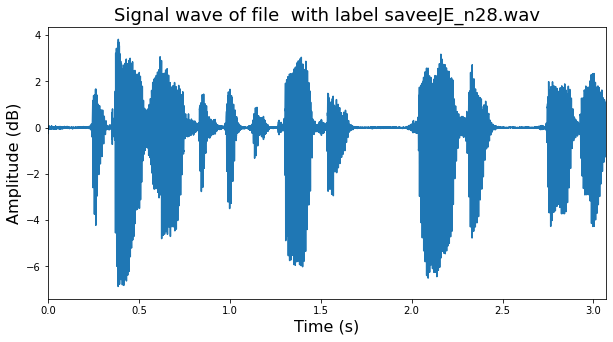

Audio file 'saveeJE_n28.wav':


In [ ]:
# Select one random audio file
random_idx = np.random.randint(len(labels))
random_label = labels[random_idx]
random_signal = signal[random_idx]
random_filename = names_file[random_idx]
print(np.arange(len(random_signal)))
print(np.arange(len(random_signal))/float(sampling_rate ))
print((np.arange(len(random_signal))/float(sampling_rate))[0])
# Plot signal wave
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(random_signal))/float(sampling_rate), random_signal)
plt.xlim((np.arange(len(random_signal))/float(sampling_rate ))[0], (np.arange(len(random_signal))/float(sampling_rate))[-1])
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude (dB)'
           , fontsize=16)
plt.title("Signal wave of file  with label {}".format(random_filename,random_label), fontsize=18)
plt.show()

# Play audio file
print("Audio file '{}':".format(random_filename))
Audio(random_signal, rate=sampling_rate)

In [ ]:
# Number of augmented data
nb_augmented = 2

# Function to add noise to a signals with a desired Signal Noise ratio (SNR)
def noisy_signal(signal, snr_low=15, snr_high=30, nb_augmented=2):
    
    # Signal length
    signal_len = len(signal)

    # Generate White noise
    noise = np.random.normal(size=(nb_augmented, signal_len))
    
    # Compute signal and noise power
    s_power = np.sum((signal / (2.0 ** 15)) ** 2) / signal_len
    n_power = np.sum((noise / (2.0 ** 15)) ** 2, axis=1) / signal_len
    
    # Random SNR: Uniform [15, 30]
    snr = np.random.randint(snr_low, snr_high)
    
    # Compute K coeff for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- snr / 10))
    K = np.ones((signal_len, nb_augmented)) * K
    
    # Generate noisy signal
    return signal + K.T * noise

In [ ]:
# Generate noisy signals from signal list
print("Data Augmentation: START")
augmented_signal = list(map(noisy_signal, signal))
print("Data Augmentation: END!")

Data Augmentation: START
Data Augmentation: END!


In [ ]:
sample_rate

16000

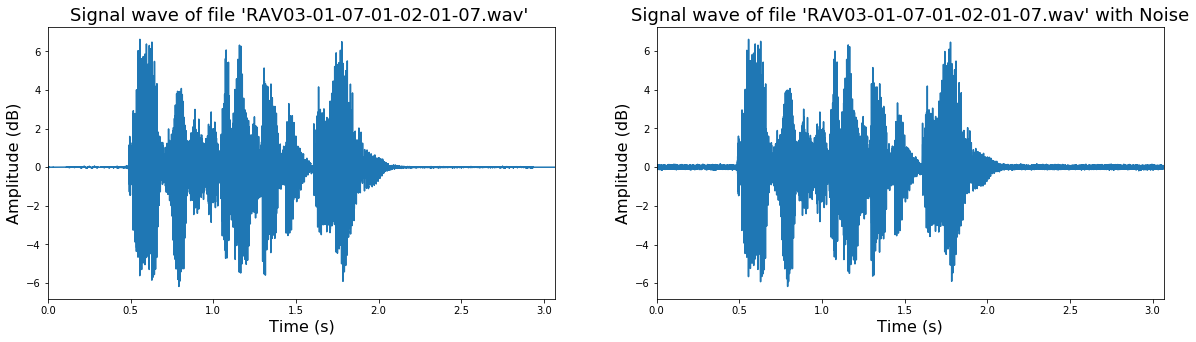

Audio file 'RAV03-01-07-01-02-01-07.wav':


Audio file 'RAV03-01-07-01-02-01-07.wav' with noise:


In [ ]:
# Plot signal wave
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.arange(len(random_signal))/float(sample_rate), random_signal)
plt.xlim((np.arange(len(random_signal))/float(sample_rate))[0], (np.arange(len(random_signal))/float(sample_rate))[-1])
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude (dB)', fontsize=16)
plt.title("Signal wave of file '{}' ".format(random_filename), fontsize=18)

# Plot signal wave with noise
plt.subplot(1,2,2)
plt.plot(np.arange(len(random_signal))/float(sample_rate), augmented_signal[random_idx][0])
plt.xlim((np.arange(len(random_signal))/float(sample_rate))[0], (np.arange(len(random_signal))/float(sample_rate))[-1])
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Amplitude (dB)', fontsize=16)
plt.title("Signal wave of file '{}' with Noise".format(random_filename), fontsize=18)
plt.show()

# Play audio file
print("Audio file '{}':".format(random_filename))
IPython.display.display(Audio(random_signal, rate=sample_rate))

# Play same audio file with noise
print("Audio file '{}' with noise:".format(random_filename))
IPython.display.display(Audio(augmented_signal[random_idx][0], rate=sample_rate))

In [ ]:
def mel_spectrogram(y, sr=16000, n_fft=512, win_length=256, hop_length=128, window='hamming', n_mels=128, fmax=4000):
    
    # Compute spectogram
    mel_spect = np.abs(librosa.stft(y, n_fft=n_fft, window=window, win_length=win_length, hop_length=hop_length)) ** 2
    
    # Compute mel spectrogram
    mel_spect = librosa.feature.melspectrogram(S=mel_spect, sr=sr, n_mels=n_mels, fmax=fmax)
    
    # Compute log-mel spectrogram
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    
    return mel_spect

In [ ]:
mel_spect.shape

(2278, 128, 384)

In [ ]:
signal[1].shape

(49100,)

In [ ]:
signalsavee[1].shape

(49100,)

In [ ]:
# Start feature extraction
print("Feature extraction: START")

# Compute spectogram for all audio file
mel_spect = np.asarray(list(map(mel_spectrogram, signal)))
augmented_mel_spect = [np.asarray(list(map(mel_spectrogram, augmented_signal[i]))) for i in range(len(augmented_signal))]

# Stop feature extraction
print("Feature extraction: END!")

Feature extraction: START
Feature extraction: END!


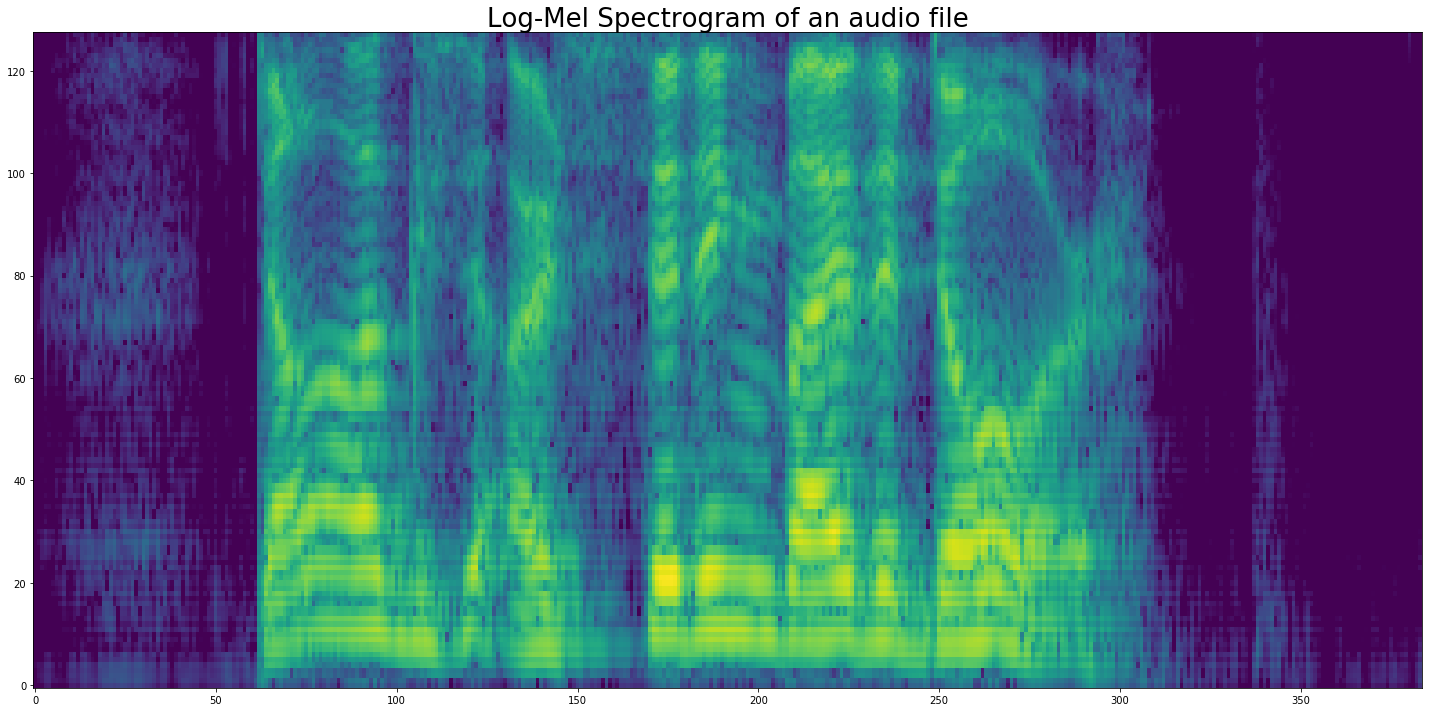

In [ ]:
# Plot one random Spectogram 
plt.figure(figsize=(20, 10))
plt.imshow(mel_spect[np.random.randint(len(augmented_mel_spect))], origin='lower', aspect='auto', cmap='viridis')
plt.title('Log-Mel Spectrogram of an audio file', fontsize=26)
plt.tight_layout()
plt.show()

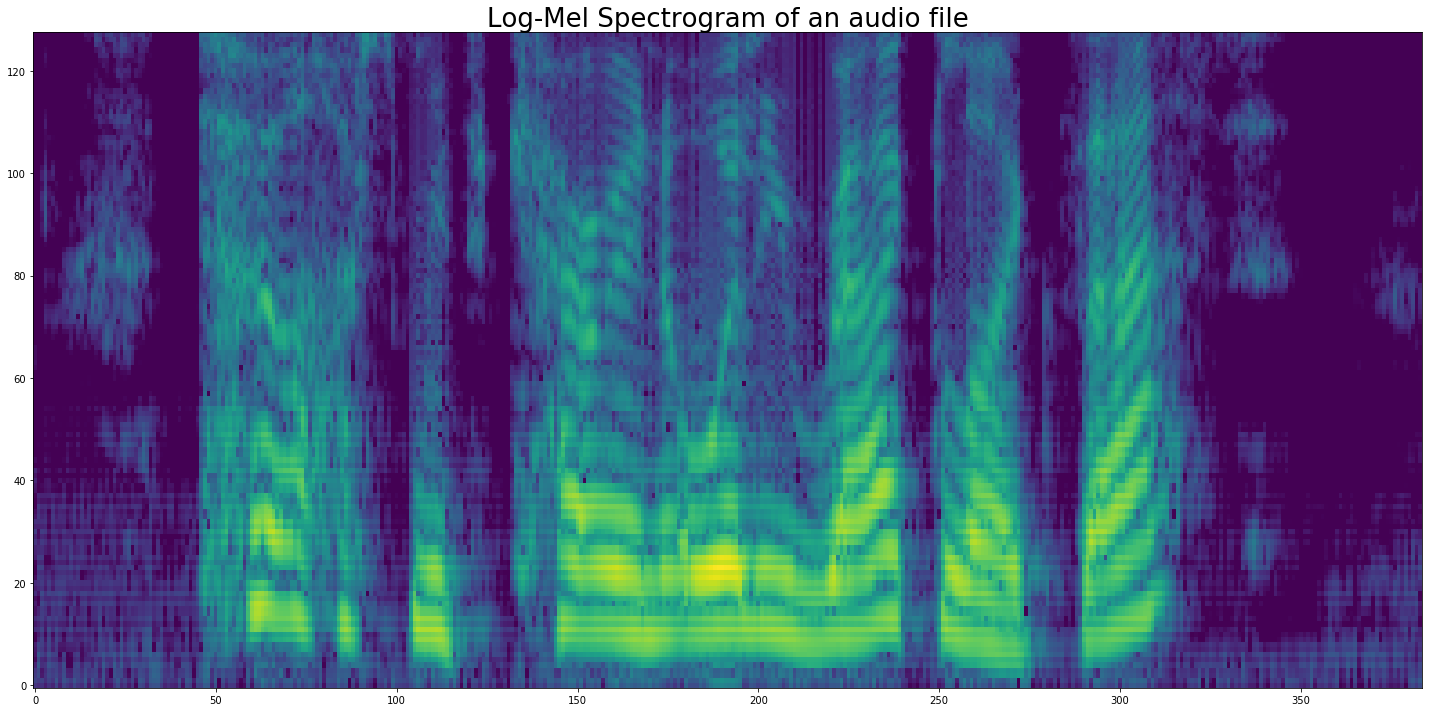

In [ ]:
# Plot one random Spectogram 
plt.figure(figsize=(20, 10))
plt.imshow(mel_spect[np.random.randint(len(mel_spect))], origin='lower', aspect='auto', cmap='viridis')
plt.title('Log-Mel Spectrogram of an audio file', fontsize=26)
plt.tight_layout()
plt.show()

In [ ]:
MEL_SPECT_train, MEL_SPECT_test, AUG_MEL_SPECT_train, AUG_MEL_SPECT_test, label_train, label_test = train_test_split(mel_spect, augmented_mel_spect,labels, test_size=0.2)


In [ ]:
aug_label_train = np.asarray(list(itertools.chain.from_iterable([[label] * nb_augmented for label in label_train])))
AUG_MEL_SPECT_train = np.asarray(list(itertools.chain.from_iterable(AUG_MEL_SPECT_train)))

In [ ]:
# Concatenate original and augmented
X_train = np.concatenate((MEL_SPECT_train, AUG_MEL_SPECT_train))
y_train = np.concatenate((label_train, aug_label_train))

# Build test set
X_test = MEL_SPECT_test
y_test = label_test

In [ ]:
# Time distributed parameters
win_ts = 128
hop_ts = 64

# Split spectrogram into frames
def frame(x, win_step=128, win_size=64):
    nb_frames = 1 + int((x.shape[2] - win_size) / win_step)
    frames = np.zeros((x.shape[0], nb_frames, x.shape[1], win_size)).astype(np.float32)
    for t in range(nb_frames):
        frames[:,t,:,:] = np.copy(x[:,:,(t * win_step):(t * win_step + win_size)]).astype(np.float32)
    return frames

# Frame for TimeDistributed model
X_train = frame(X_train, hop_ts, win_ts)
X_test = frame(X_test, hop_ts, win_ts)

In [ ]:
X_train.shape

(5466, 5, 128, 128)

In [ ]:
# Save Train and test set
pickle.dump(X_train.astype(np.float16), open('/content/drive/My Drive/Emotion/DIS/[RAVemosav][MEL_SPECT][X_train].p', 'wb'))
pickle.dump(y_train, open('/content/drive/My Drive/Emotion/DIS/[RAVemosav][MEL_SPECT][y_train].p', 'wb'))
pickle.dump(X_test.astype(np.float16), open('/content/drive/My Drive/Emotion/DIS/[RAVemosav][MEL_SPECT][X_test].p', 'wb'))
pickle.dump(y_test, open('/content/drive/My Drive/Emotion/DIS/[RAVemosav][MEL_SPECT][y_test].p', 'wb'))

In [ ]:
### General imports ###
import os
from glob import glob
import pickle
import numpy as np

### Plot imports ###
from IPython.display import Image
import matplotlib.pyplot as plt

### Time Distributed ConvNet imports ###
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
from keras.utils import np_utils
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
import pydot
### Warning ###
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(np.ravel(y_train)))
y_test = np_utils.to_categorical(lb.transform(np.ravel(y_test)))

In [ ]:
# Reshape for convolution
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , X_train.shape[2], X_train.shape[3], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , X_test.shape[2], X_test.shape[3], 1)

In [ ]:
X_train.shape

(5466, 5, 128, 128, 1)

In [ ]:
K.clear_session()

# Define two sets of inputs: MFCC and FBANK
input_y = Input(shape=X_train.shape[1:], name='Input_MELSPECT')

## First LFLB (local feature learning block)
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_1_MELSPECT')(input_y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_1_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_1_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'), name='MaxPool_1_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_1_MELSPECT')(y)     

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_2_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_2_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_2_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_2_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_2_MELSPECT')(y)

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_3_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_3_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_3_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_3_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_3_MELSPECT')(y)

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_4_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_4_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_4_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_4_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_4_MELSPECT')(y)  

## Flat
y = TimeDistributed(Flatten(), name='Flat_MELSPECT')(y)                      
                               
# Apply 2 LSTM layer and one FC
y = LSTM(256, return_sequences=False, dropout=0.2, name='LSTM_1')(y)
y = Dense(y_train.shape[1], activation='softmax', name='FC')(y)

# Build final model
model = Model(inputs=input_y, outputs=y)

# Plot model graph
#plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
#Image(retina=True, filename='model.png')

In [ ]:
# Compile model
model.compile(optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.8), loss='categorical_crossentropy', metrics=['accuracy'])

# Save best model
best_model_save = ModelCheckpoint('/content/drive/My Drive/Emotion/DIS/[CNN-LSTM]Model.hdf5', save_best_only=True, monitor='val_acc', mode='max')

# Early stopping
early_stopping = EarlyStopping(monitor='val_acc', patience=30, verbose=1, mode='max')

# Fit model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping, best_model_save])